# Loading Larger than memory data with Dask Dataframes

In [1]:
import dask.dataframe as df

## Data Taken from : https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory

In [14]:
library_df = df.read_csv('../data/archive/libary-part-0**.csv')

In [15]:
library_df

Dask DataFrame Structure:
                Unnamed: 0 BibNum   Title  Author    ISBN PublicationYear Publisher Subjects ItemType ItemCollection FloatingItem ItemLocation ReportDate ItemCount
npartitions=200                                                                                                                                                    
                     int64  int64  object  object  object          object    object   object   object         object       object       object     object     int64
                       ...    ...     ...     ...     ...             ...       ...      ...      ...            ...          ...          ...        ...       ...
...                    ...    ...     ...     ...     ...             ...       ...      ...      ...            ...          ...          ...        ...       ...
                       ...    ...     ...     ...     ...             ...       ...      ...      ...            ...          ...          ...        ...       ...
                       ...    ...     ...     ...     ...             ...       ...      ...      ...            ...          ...          ...        ...       ...
Dask Name: from-delayed, 600 tasks

In [16]:
%time len(library_df)

CPU times: user 1min 59s, sys: 10.1 s, total: 2min 9s
Wall time: 1min 29s


19500048

In [18]:
# Currently in 1.2.1 inplace arguement is not supported
library_df = library_df.drop('Unnamed: 0', axis=1)

In [19]:
library_df.head()

BibNum                                              Title  \
0  3011076  A tale of two friends / adapted by Ellie O'Rya...   
1  2248846  Naruto. Vol. 1, Uzumaki Naruto / story and art...   
2  3209270  Peace, love & Wi-Fi : a ZITS treasury / by Jer...   
3  1907265     The Paris pilgrims : a novel / Clancy Carlile.   
4  1644616  Erotic by nature : a celebration of life, of l...   

                      Author  \
0              O'Ryan, Ellie   
1  Kishimoto, Masashi, 1974-   
2        Scott, Jerry, 1955-   
3     Carlile, Clancy, 1930-   
4                        NaN   

                                                ISBN PublicationYear  \
0  1481425730, 1481425749, 9781481425735, 9781481...           2014.   
1                                         1569319006    2003, c1999.   
2                          144945867X, 9781449458676           2014.   
3                                         0786706155          c1999.   
4                                         094020813X    1991, c1988.   

                           Publisher  \
0                   Simon Spotlight,   
1                               Viz,   
2         Andrews McMeel Publishing,   
3                    Carroll & Graf,   
4  Red Alder Books/Down There Press,   

                                            Subjects ItemType ItemCollection  \
0  Musicians Fiction, Bullfighters Fiction, Best ...     jcbk          ncrdr   
1  Ninja Japan Comic books strips etc, Comic book...     acbk        nycomic   
2  Duncan Jeremy Fictitious character Comic books...     acbk        nycomic   
3  Hemingway Ernest 1899 1961 Fiction, Biographic...     acbk          cafic   
4  Erotic literature American, American literatur...     acbk           canf   

  FloatingItem ItemLocation               ReportDate  ItemCount  
0     Floating          qna  2017-09-01T00:00:00.000          1  
1          NaN          lcy  2017-09-01T00:00:00.000          1  
2          NaN          bea  2017-09-01T00:00:00.000          1  
3          NaN          cen  2017-09-01T00:00:00.000          1  
4          NaN          cen  2017-09-01T00:00:00.000          1

In [21]:
group_publication_yr = library_df.groupby('PublicationYear').count()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.456874 to fit


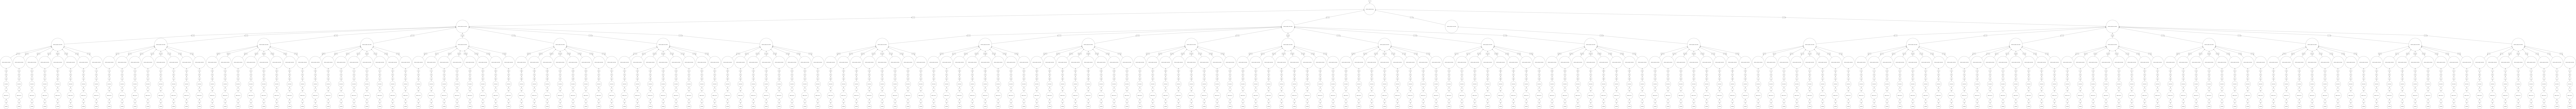

In [23]:
group_publication_yr.visualize(filename='pub_year.png')

In [24]:
library_df.npartitions

200

In [26]:
%time _ = group_publication_yr.compute()

CPU times: user 2min 17s, sys: 9.81 s, total: 2min 27s
Wall time: 1min 43s


In [27]:
group_author = library_df.groupby('Author')['ItemCount'].sum()

In [29]:
%time group_author.compute()

CPU times: user 2min 41s, sys: 9.88 s, total: 2min 51s
Wall time: 2min 1s


Author
!!! (Musical group)                                                251
"Avion,", pseud.                                                    28
'N Sync (Musical group)                                             36
(Alina Iosifovna)                                                   29
-Ky                                                                 15
.38 Special (Musical group)                                         16
10,000 Maniacs (Musical group)                                     182
2 Chainz, 1977-                                                    127
3 Doors Down (Musical group)                                       108
311 (Musical group)                                                193
3OH!3 (Musical group)                                               87
5 Browns                                                            72
5 Seconds of Summer (Musical group)                                148
50 Cent (Musician)                                                 619

### Reference : https://stackoverflow.com/a/29581287/8160718

In [31]:
import re
def extract_year(year_text, *args, **kwargs):
    if type(year_text)==type(''):
        return re.findall("[-+]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", year_text)
    else:
        return year_text

seperate_publication_year = library_df['PublicationYear'].apply(extract_year,
                                                           axis=1,
                                                           meta=('PublicationYear', 'object'))

In [32]:
%time seperate_publication_year.compute()

CPU times: user 2min 40s, sys: 10.8 s, total: 2min 51s
Wall time: 2min 10s


0             [2014.]
1       [2003, 1999.]
2             [2014.]
3             [1999.]
4       [1991, 1988.]
5             [1997.]
6             [1989.]
7              [2017]
8             [2017.]
9              [2017]
10            [2014.]
11             [2015]
12             [2006]
13            [2017.]
14            [2017.]
15            [2015.]
16            [2016.]
17             [2015]
18            [2016.]
19            [2008.]
20            [2016.]
21            [2000.]
22            [1960.]
23            [2000.]
24            [2014.]
25             [2014]
26             [2014]
27            [2005.]
28            [2008.]
29            [2004.]
            ...      
2137           [2014]
2138           [2005]
2139          [2012.]
2140          [2007.]
2141           [2011]
2142          [2016.]
2143          [1984.]
2144          [2006.]
2145          [2016.]
2146       [78, 1989]
2147          [2011.]
2148           [2010]
2149           [1988]
2150          [2005.]
2151      